# Data Cleaning Notebook

## Objectives

*   For favouries upcoming ´Machine Learning´ processes a complete dataset is needed, therefore following tasks should be handled:
*   Evaluate missing data
*   Clean data
*   Split data into a train and test part as precursor for ´ML - Model training´

## Inputs

* outputs/datasets/collection/LoanStatusPrediction.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Conclusions

 
  * Data Cleaning Pipeline
  * Drop Variables:  `['Unnamed: 0']`



---


# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/LoanerAI/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/LoanerAI'

---

# Load Collected data

In [4]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/GermanCreditData.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,NaN,2096,12,education,1


# Data Exploration

Checking the distribution and shape of a variables with missing data.

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['Saving accounts', 'Checking account']

In [6]:
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation and PPS Analysis

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


Calculate Correlations and Power Predictive Score

In [8]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%  75%    max
ppscore  110.0  0.011  0.036  0.0  0.0  0.0  0.0  0.205


Display at Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



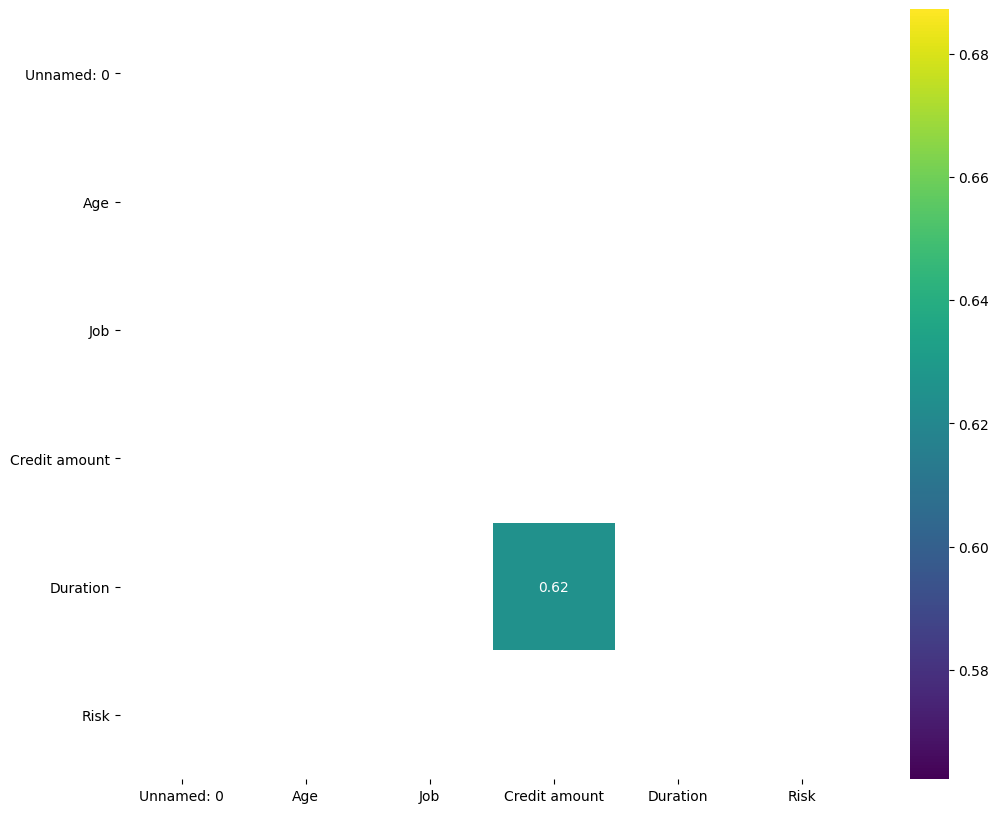



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



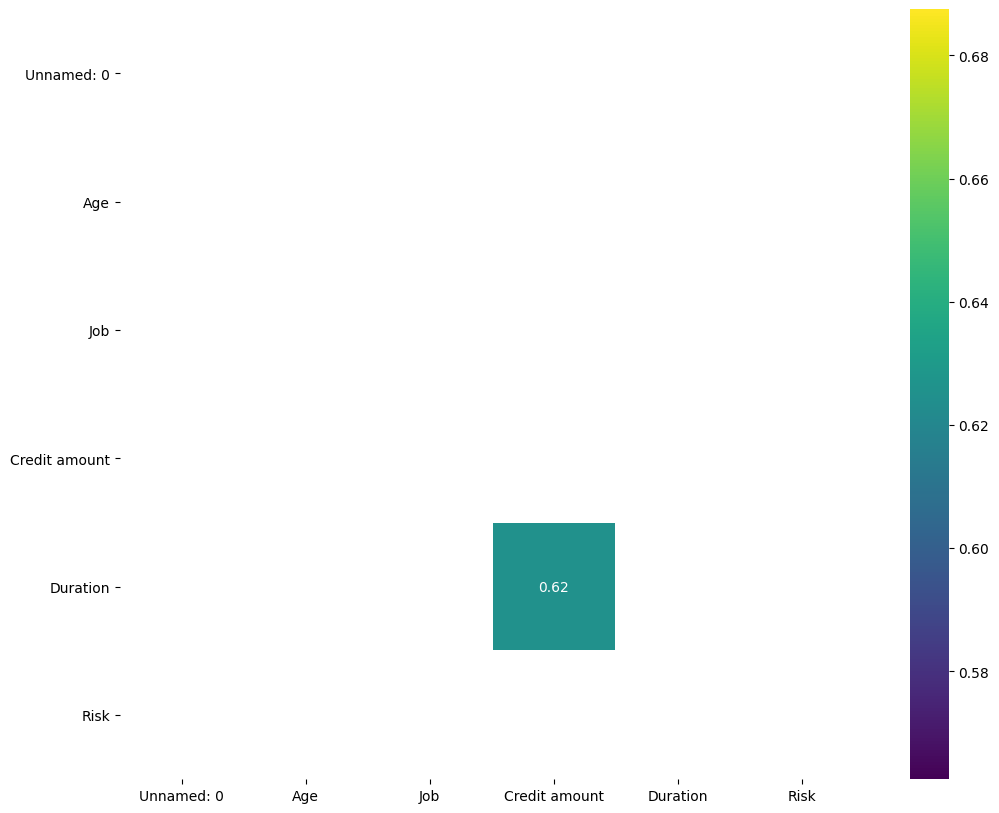



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



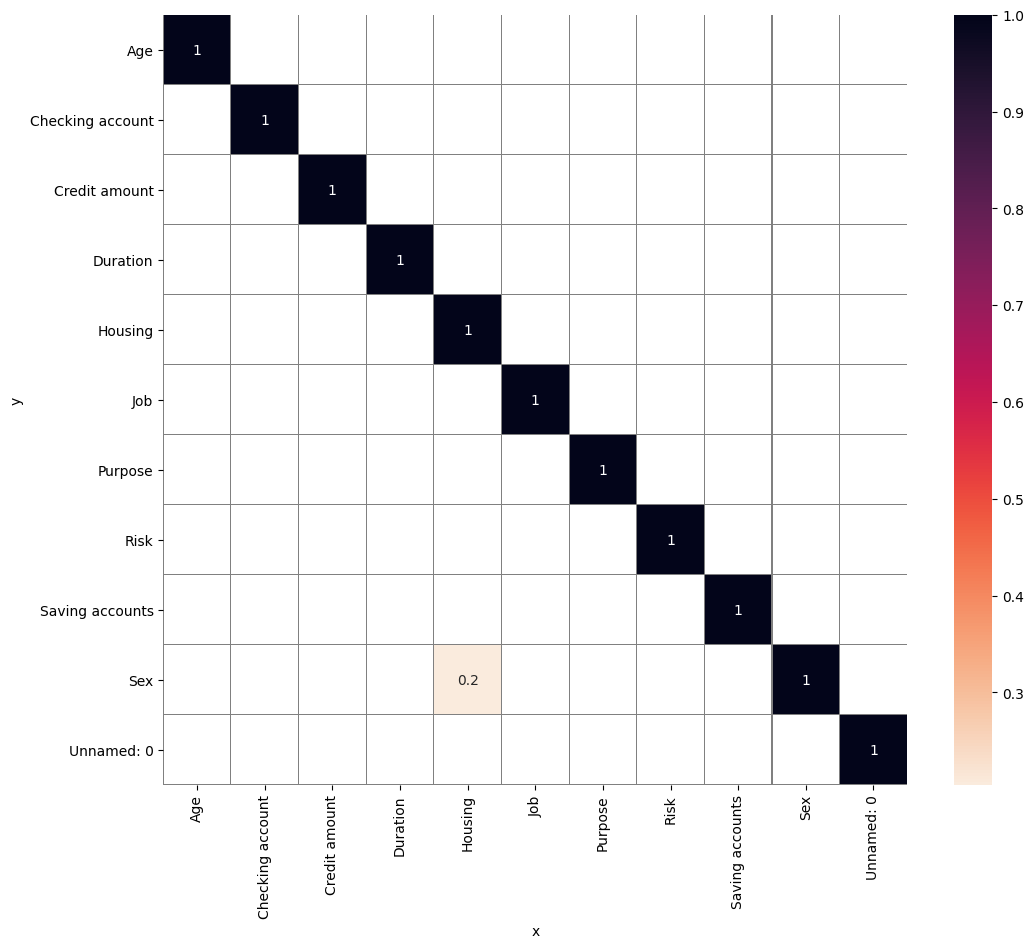

In [9]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

# Data Cleaning

## Assessing Missing Data Levels

* Custom function to display missing data levels in a DataFrame, it shows the absolute levels, relative levels and data type.

In [10]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data


Check missing data levels for the collected dataset.

In [11]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
Checking account,394,39.4,object
Saving accounts,183,18.3,object


## Dealing with Missing Data

Handling missing data is crucial for the upcoming Correlation Study to work, several strategies exist.
* Dropping missing values
* Dropping missing variables
* Imputation, e.g. with the help of mean/ median
* Predictive Imputation

In the following a simple imputation technique is used, based on `median` for numerical variables and `most_frequent` for categorical variables. The imputation takes place for missing values.

### Advantages of Dropping Rows
*   Simplicity: Straightforward approach that leaves you only with complete cases, ensuring that all analyses or modeling efforts are performed on fully observed data.
*   Purity: No need to make assumptions or impute values, which can introduce bias or inaccuracies, especially if the missing data mechanism is not well understood or unknown.
### Disadvantages of Dropping Rows
*   Data Loss: If a significant portion of your data has missing values, dropping rows can lead to a substantial reduction in dataset size, potentially discarding valuable information and reducing the statistical power of your analyses or models.
* Bias Introduction: If the data is not missing completely at random (MCAR), dropping rows with missing values can introduce bias, making your dataset unrepresentative of the population you're studying.

### Drop Variables
*   It is possible to drop Variables with more than 80% of missing data since these variables will likely not add much value. However, this is not the case in this dataset
*   Dropping `Unnamed: 0` since it is a unique identifier for each applicant, it doesn't add information to the dataset as it is.

### Data Cleaning

In [12]:
### For dropping rows set impute to False
impute = True 

In [13]:
### Dropping (redundant) variables
variables_to_drop = ['Unnamed: 0']

print(f"* {len(variables_to_drop)} variables to drop \n\n"
    f"{variables_to_drop}")

# Drop each variable in the list
for variable in variables_to_drop:
    df = df.drop(columns=variable)
    print("Variable dropped:", variable)

* 1 variables to drop 

['Unnamed: 0']
Variable dropped: Unnamed: 0


In [14]:
from sklearn.impute import SimpleImputer
from feature_engine.encoding import OneHotEncoder

if impute:
    # For numerical variables
    imputer_num = SimpleImputer(strategy='median')
    numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_vars] = imputer_num.fit_transform(df[numerical_vars])

    # For categorical variables
    imputer_cat = SimpleImputer(strategy='most_frequent')
    categorical_vars = df.select_dtypes(include=['object']).columns
    df[categorical_vars] = imputer_cat.fit_transform(df[categorical_vars])

else:
    df_dropped = df.dropna()
    print("Original DataFrame shape:", df.shape)
    print("New DataFrame shape after dropping rows with missing values:", df_dropped.shape)
    df = df_dropped
    print("Dataframe df overwritten with df_dropped")


### Split Train and Test Set

In [16]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['Risk'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (800, 10) 
TestSet shape: (200, 10)


In [17]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


# Push cleaned data to Repo

In [18]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/cleaned'


## Train Set

In [ ]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

## Test Set

In [ ]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)